In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
df = pd.read_csv('/content/med_insurance.csv')

In [44]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [45]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


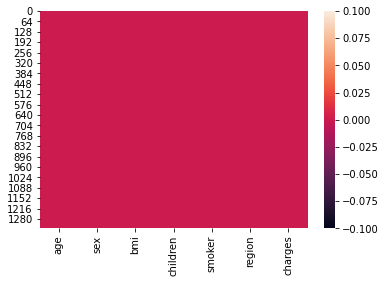

In [47]:
sns.heatmap(df.isnull())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


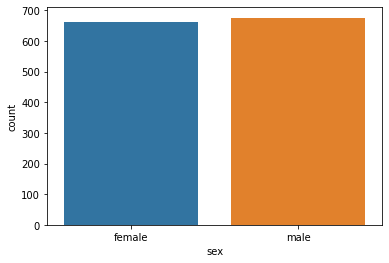

In [48]:
sns.countplot(df['sex'],data=df)

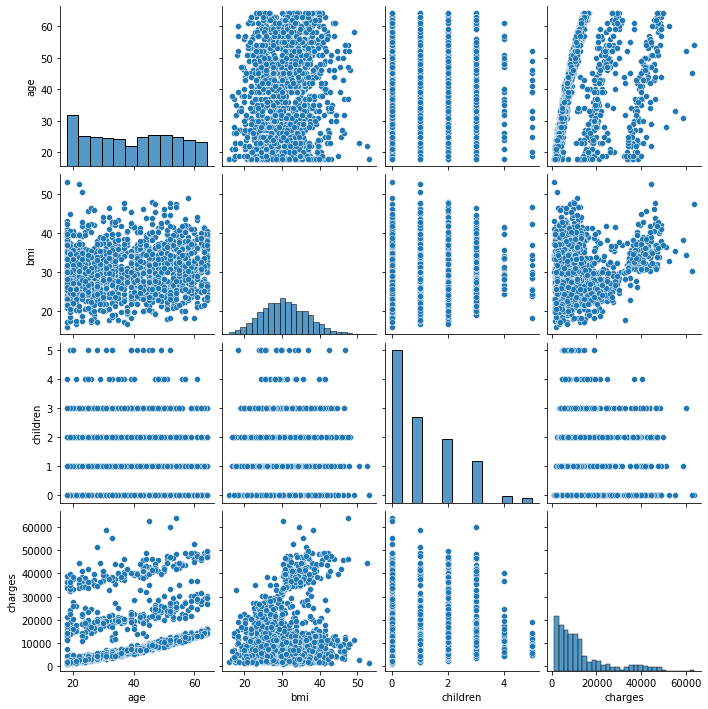

In [49]:
sns.pairplot(df)

In [50]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [51]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [52]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [53]:
g = pd.get_dummies(df['sex'])
g

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [54]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [55]:
sm = {'yes':1,'no':0}

In [56]:
df['smoker'] = df['smoker'].map(sm)
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [57]:
df.drop(['sex'],axis=1,inplace=True)

In [58]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [59]:
rg = {'southwest':1,'southeast':2,'northwest':3,'northeast':4}
df['region'] = df['region'].map(rg)

In [60]:
pd.concat([df,g],axis=1)

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,1,1,16884.92400,1,0
1,18,33.770,1,0,2,1725.55230,0,1
2,28,33.000,3,0,2,4449.46200,0,1
3,33,22.705,0,0,3,21984.47061,0,1
4,32,28.880,0,0,3,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,3,10600.54830,0,1
1334,18,31.920,0,0,4,2205.98080,1,0
1335,18,36.850,0,0,2,1629.83350,1,0
1336,21,25.800,0,0,1,2007.94500,1,0


In [61]:
X = df.drop('charges',axis=1)
Y = df['charges']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,
                                                 random_state=0)

In [63]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred = LR.predict(X_test)
y_pred

array([10945.94410744,  9766.52607911, 38025.70403073, 16074.37651458,
        7004.61918976,  4160.38673526,  1746.89886466, 14275.36775067,
        9024.54125231,  7546.86241104,  4744.03844244, 10292.45934915,
        8594.25290991,  4175.01486394, 27968.40797566, 11027.78147639,
       11283.97664595,  6195.21915252,  8267.62015274, 27261.43794259,
       33685.30234869, 14249.6555435 , 11737.50944893, 32421.52699196,
        4473.67935255,  9262.84741679,  1338.15652067, 10085.22008629,
        4135.67876875, 10420.14363062,  9034.81705214, 40175.82671563,
       15325.95369444, 13539.91283021, 24981.38282652,  5274.80111536,
       12807.61476853, 30537.44116817, 33506.08642477,  3479.5859119 ,
        4170.66253509,  4344.96964494, 30641.25695544, 39365.4227907 ,
       28068.4718328 ,  5112.80023319, 10921.22706008,  7868.67297113,
        3792.46501162, 10531.49677536,  5760.30667151,  3528.16406099,
       32835.86592677, 38433.78165849, 16121.31580686,  7197.03495674,
      

In [65]:
LR.coef_

array([  250.53594959,   322.89217063,   450.17353748, 23602.42839309,
         341.26222126])

In [66]:
LR.intercept_

-12624.704583188262

In [67]:
print('Mean absolute error : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error :  3998.038877607536
Mean squared error :  32072659.036049385
RMSE :  5663.272820202942


In [70]:
df1 = pd.DataFrame({'Actual Data ':y_test,'Predicted Data':y_pred})
df1

,Actual Data,Predicted Data
578,9724.53000,10945.944107
610,8547.69130,9766.526079
569,45702.02235,38025.704031
1034,12950.07120,16074.376515
198,9644.25250,7004.619190
...,...,...
574,13224.05705,14994.827495
1174,4433.91590,6933.039293
1327,9377.90470,10981.778710
817,3597.59600,6808.704622


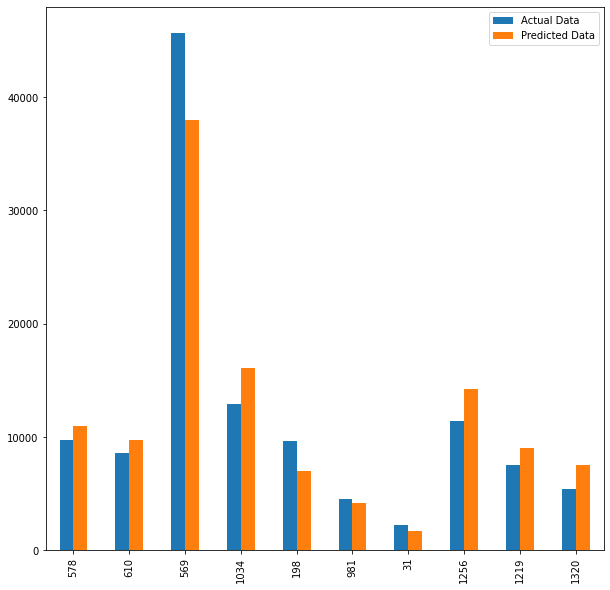

In [73]:
df2 = df1.head(10)
df2.plot(kind='bar',figsize=(10,10))
plt.show()